# **Introduction**

The feature data 'X' consists of various details about cars, excluding the type of fuel they use, which is represented by the target variable, y. These details include how many miles a car can travel on a gallon of fuel in the city or on the highway, the size of the car's engine, the year it was made, and whether it has an automatic or manual transmission, amongst others.

The goal of the clustering analysis is to sort cars into groups based on these features. By doing this, we hope to find patterns or similar characteristics among cars. This can help us understand what types of cars are more alike and could also help predict the type of fuel a car uses based on its features. This information can be valuable for automobile manufacturers who want to understand what kinds of cars to make, or for buyers who are looking for a new car that fits certain criteria.

# **Theory**

## KMEANS:

In the automotive dataset, we can aim to distinguish between two predominant types of fuel consumption across various car makes and models. K-Means clustering is a suitable method for identifying these distinct groups. To begin, we need to determine the optimal number of clusters, denoted by 'k'. This number represents the groups we intend to identify within our data.

The K-Means algorithm starts by randomly selecting 'k' centroids, which are the initial points around which clusters are formed. Each data point is then assigned to the nearest centeroid based on a distance metric, and the centroids are recalculated as the mean of all points in the cluster. This process continues, reassigning data points to clusters and recalculating centroids, until the cluster assignments no longer change significantly, indicating that the clusters have stabilized.

When determining the value of 'k', we can utilize the elbow method as a more systematic strategy than simple trial and error. By plotting the  variance in the clusters against different values of 'k', we look for the 'elbow' in the graph - a point where the rate of decrease in variance sharply changes. The value of 'k' at this elbow point is often considered an indicator of the optimal number of clusters, as it suggests a balance between minimizing variance and the number of clusters.

## DBSCAN:

DBSCAN is a clustering algorithm that's effective for data with complex shapes and varying densities, unlike K-Means which works best with spherical clusters. It starts by checking how many points are within a certain distance, called 'epsilon', from a random point. If there are enough points within this radius, a cluster forms around that point. The process continues as DBSCAN searches for more points to add to the cluster, expanding based on the density of points. Points that don't belong to any cluster are marked as outliers. This method is good for identifying clusters that aren't obvious and separating them from random noise in the data.

The silhouette method is a way to determine how well data is clustered. It calculates a score for each data point to see how similar it is to its own cluster compared to other clusters. This score ranges from -1 (meaning the data might be in the wrong cluster) to +1 (indicating the data is well placed in its own cluster). A higher average score across all data points suggests better clustering. By comparing these scores for different numbers of clusters, we can choose the best number of clusters for the data. This method helps to visually understand and assess the separation and quality of the clusters formed.

## Hierarchical Clustering:

In hierarchical clustering, each data point is initially treated as a single cluster. For example, every row in a DataFrame is considered an individual cluster, and the algorithm searches for rows with the most similar attributes to gather together. The clustering results are organized and visualized using dendrograms, which offer a bottom-up view of the separation of different clusters.

Various distance metrics are used to determine the similarity between data points, with Euclidean distance being the most commonly used. In this notebook, we will explore different distance metrics and interpret their effectiveness in clustering analysis.

# **Methods:**

# Data selection

In [205]:
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
from numpy import linalg as LA

In [206]:
record_data = pd.read_csv('../eda/cars-data.csv')

record_data.head()

,Unnamed: 0,city_mpg,class,combination_mpg,cylinders,displacement,drive,fuel_type,highway_mpg,make,model,transmission,year
0,0,18,midsize car,21,4.0,2.2,fwd,gas,26,toyota,Camry,a,1993
1,1,19,midsize car,22,4.0,2.2,fwd,gas,27,toyota,Camry,m,1993
2,2,16,midsize car,19,6.0,3.0,fwd,gas,22,toyota,Camry,a,1993
3,3,16,midsize car,18,6.0,3.0,fwd,gas,22,toyota,Camry,m,1993
4,4,18,midsize-large station wagon,21,4.0,2.2,fwd,gas,26,toyota,Camry,a,1993


In [207]:
nan_count = record_data.isna().sum()

print(nan_count)

Unnamed: 0          0
city_mpg            0
class               0
combination_mpg     0
cylinders          25
displacement       25
drive               3
fuel_type           0
highway_mpg         0
make                0
model               0
transmission        0
year                0
dtype: int64


In [208]:
record_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       80 non-null     int64  
 1   city_mpg         80 non-null     int64  
 2   class            80 non-null     object 
 3   combination_mpg  80 non-null     int64  
 4   cylinders        55 non-null     float64
 5   displacement     55 non-null     float64
 6   drive            77 non-null     object 
 7   fuel_type        80 non-null     object 
 8   highway_mpg      80 non-null     int64  
 9   make             80 non-null     object 
 10  model            80 non-null     object 
 11  transmission     80 non-null     object 
 12  year             80 non-null     int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 8.3+ KB


In [209]:
# Convert all 'object' type columns to 'string'
for col in record_data.select_dtypes(include=['object']).columns:
    record_data[col] = record_data[col].astype('string')

# Verify the changes
record_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       80 non-null     int64  
 1   city_mpg         80 non-null     int64  
 2   class            80 non-null     string 
 3   combination_mpg  80 non-null     int64  
 4   cylinders        55 non-null     float64
 5   displacement     55 non-null     float64
 6   drive            77 non-null     string 
 7   fuel_type        80 non-null     string 
 8   highway_mpg      80 non-null     int64  
 9   make             80 non-null     string 
 10  model            80 non-null     string 
 11  transmission     80 non-null     string 
 12  year             80 non-null     int64  
dtypes: float64(2), int64(5), string(6)
memory usage: 8.3 KB


In [210]:
# get y 

y = record_data['fuel_type'].unique().tolist()

y

['gas', 'electricity']

In [211]:
# Dropping non-numerical and unnecessary columns
record_data = record_data.drop(columns=['Unnamed: 0'])

In [212]:
# Replace continuous missing values with mean of the column. check for Nan values again.

cols = ['displacement', 'cylinders']
record_data[cols] = record_data[cols].fillna(record_data[cols].mean())

nan_count = record_data.isna().sum()
print(nan_count)

city_mpg           0
class              0
combination_mpg    0
cylinders          0
displacement       0
drive              3
fuel_type          0
highway_mpg        0
make               0
model              0
transmission       0
year               0
dtype: int64


In [213]:
# Replace categorical missing values with mode of the column. check for Nan values again.

record_data['drive'] = record_data['drive'].fillna(record_data['drive'].mode().iloc[0])

nan_count = record_data.isna().sum()
print(nan_count)

city_mpg           0
class              0
combination_mpg    0
cylinders          0
displacement       0
drive              0
fuel_type          0
highway_mpg        0
make               0
model              0
transmission       0
year               0
dtype: int64


In [214]:
# Using a for loop to replace categorical values with cat codes
cat_cols = ['class', 'drive', 'fuel_type', 'make', 'model', 'transmission']
for col in cat_cols:
    record_data[col] = record_data[col].astype('category')
    record_data[col] = record_data[col].cat.codes

# Display the altered DataFrame
record_data.head()

,city_mpg,class,combination_mpg,cylinders,displacement,drive,fuel_type,highway_mpg,make,model,transmission,year
0,18,2,21,4.0,2.2,1,1,26,6,3,0,1993
1,19,2,22,4.0,2.2,1,1,27,6,3,1,1993
2,16,2,19,6.0,3.0,1,1,22,6,3,0,1993
3,16,2,18,6.0,3.0,1,1,22,6,3,1,1993
4,18,3,21,4.0,2.2,1,1,26,6,3,0,1993


In [215]:
# Split the dataset in X and y. since this is unsupervised learning, we will not use the y labels. you can choose to normalize the X data by using the StandardScaler function.

x_cols = ['city_mpg', 'class', 'combination_mpg', 'cylinders', 'displacement', 'drive', 'highway_mpg', 'make', 'model', 'transmission', 'year' ]
y_cols = ['fuel_type']

X = record_data[x_cols]  #'fuel_type' is the column we want to predict.
y = record_data[y_cols]


X = StandardScaler().fit_transform(X)

# KMEANS

In [216]:
# import relevent libraries for clustering. we will use KMeans, hierarchical clustering and DBSCAN

import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
import matplotlib.pyplot as plt

In [217]:
# code modified from: https://medium.com/nerd-for-tech/k-means-clustering-using-python-2150769bd0b9

In [218]:
#get the value from the features in array format
features_value = X
features_value

array([[-0.62883646, -0.73831341, -0.61329244, -1.17319439, -0.9119434 ,
         0.13303802, -0.5762842 ,  1.25937568, -0.97618706, -0.55809982,
        -0.90149708],
       [-0.60370813, -0.73831341, -0.58645251, -1.17319439, -0.9119434 ,
         0.13303802, -0.54706827,  1.25937568, -0.97618706,  1.79179416,
        -0.90149708],
       [-0.67909312, -0.73831341, -0.66697231,  0.52485012,  0.06434637,
         0.13303802, -0.69314792,  1.25937568, -0.97618706, -0.55809982,
        -0.90149708],
       [-0.67909312, -0.73831341, -0.69381224,  0.52485012,  0.06434637,
         0.13303802, -0.69314792,  1.25937568, -0.97618706,  1.79179416,
        -0.90149708],
       [-0.62883646, -0.4501911 , -0.61329244, -1.17319439, -0.9119434 ,
         0.13303802, -0.5762842 ,  1.25937568, -0.97618706, -0.55809982,
        -0.90149708],
       [-0.50319481, -1.31455802, -0.53277265, -1.17319439, -1.64416072,
         0.13303802, -0.5762842 ,  1.25937568, -0.54232614, -0.55809982,
        -0.901

In [219]:
#finding the optimal number of k for clustering using elbow method
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

inertia = []
distortions = []

K = range(1,11)

for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(features_value)
    inertia.append(km.inertia_)
    distortions.append(sum(np.min(cdist(features_value,
    km.cluster_centers_, 'euclidean'),axis=1)) /
    features_value.shape[0])

/Users/isfarbaset/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/isfarbaset/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/isfarbaset/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/isfarbaset/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init

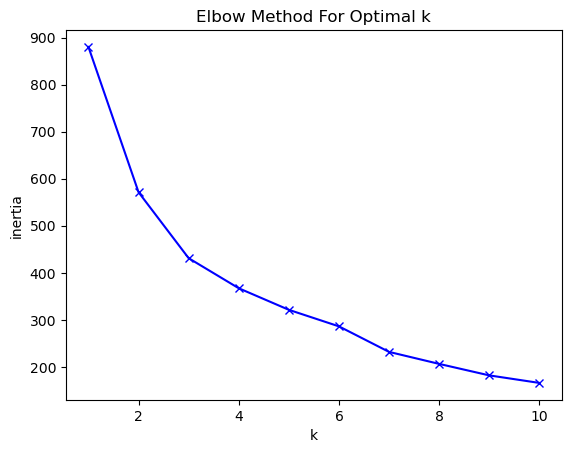

In [220]:
#Plotting the inertia result to find the elbow
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [221]:
df = pd.DataFrame({
    'Cluster': list(K),
    'Distortion': distortions,
    'Inertia': inertia
})

# Display the DataFrame
print(df)

   Cluster  Distortion     Inertia
0        1    3.253657  880.000000
1        2    2.569123  571.256625
2        3    2.247452  431.099415
3        4    2.074792  367.225073
4        5    1.948127  321.355477
5        6    1.801716  286.223699
6        7    1.645764  231.957900
7        8    1.543608  206.472799
8        9    1.448900  182.052608
9       10    1.327757  166.045786


In [222]:
# plot distortion and inertia for kmeans, you can either plot them seperately or use fig, ax = plt.subplots(1, 2) to plot them in the same figure. Suggest the optimal number of clusters based on the plot.

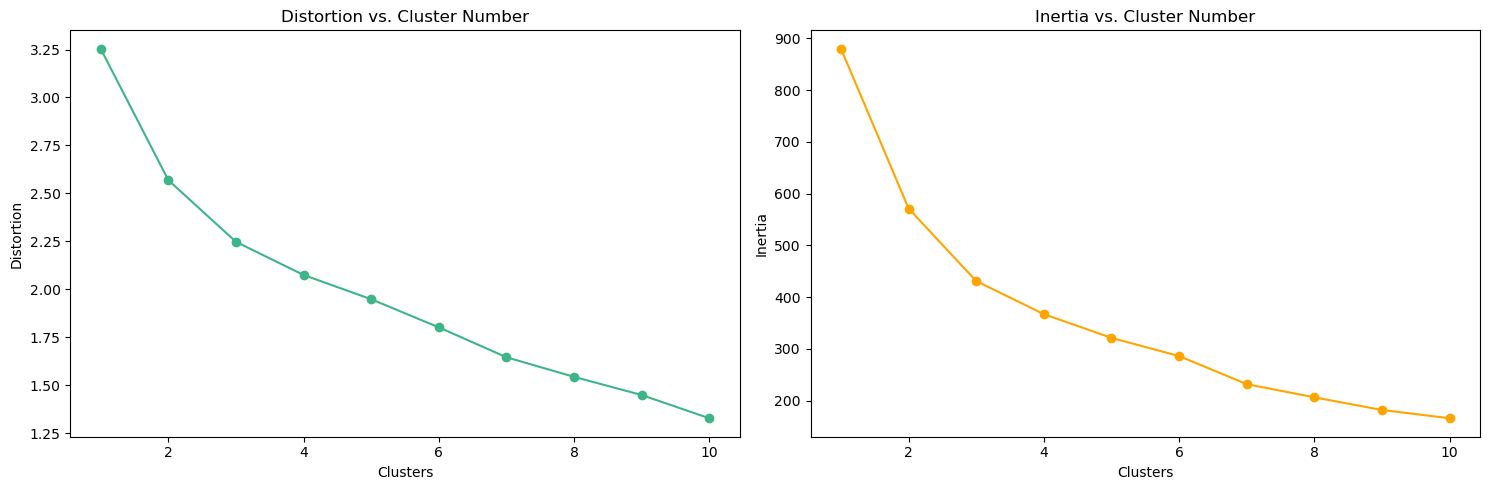

In [223]:
# Creating subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plotting Distortion
ax[0].plot(K, distortions, marker='o', color='#3EB489')
ax[0].set_title('Distortion vs. Cluster Number')
ax[0].set_xlabel('Clusters')
ax[0].set_ylabel('Distortion')

# Plotting Inertia
ax[1].plot(K, inertia, marker='o', color='#FFA500')
ax[1].set_title('Inertia vs. Cluster Number')
ax[1].set_xlabel('Clusters')
ax[1].set_ylabel('Inertia')

plt.tight_layout()
plt.show()



Based on the plots, the optimal number of clusters seems to be 2. Beyond 2 clusters, both distortion and inertia rates slow down significantly.

# DBSCAN

In [224]:
# perform DBSCAN clustering. use the eps and min_samples parameters to find the optimal number of clusters. plot the number of clusters vs the silhouette score. Suggest the optimal number of clusters based on the plot.

import sklearn.cluster

# UTILITY FUNCTION
# THIS WILL ITERATE OVER ONE HYPER-PARAMETER (GRID SEARCH)
# AND RETURN THE CLUSTER RESULT THAT OPTIMIZES THE SILHOUETTE SCORE
def maximize_silhouette(X,algo="birch",nmax=20,i_plot=False):

    # PARAM
    i_print=False

    #FORCE CONTIGUOUS
    X=np.ascontiguousarray(X)

    # LOOP OVER HYPER-PARAM
    params=[]; sil_scores=[]
    sil_max=-10
    for param in range(2,nmax+1):
        if(algo=="birch"):
            model = sklearn.cluster.Birch(n_clusters=param).fit(X)
            labels=model.predict(X)

        if(algo=="ag"):
            model = sklearn.cluster.AgglomerativeClustering(n_clusters=param).fit(X)
            labels=model.labels_

        if(algo=="dbscan"):
            param=0.25*(param-1)
            model = sklearn.cluster.DBSCAN(eps=param).fit(X)
            labels=model.labels_

        if(algo=="kmeans"):
            model = sklearn.cluster.KMeans(n_clusters=param).fit(X)
            labels=model.predict(X)

        try:
            sil_scores.append(sklearn.metrics.silhouette_score(X,labels))
            params.append(param)
        except:
            continue

        if(i_print): print(param,sil_scores[-1])

        if(sil_scores[-1]>sil_max):
             opt_param=param
             sil_max=sil_scores[-1]
             opt_labels=labels

    print("OPTIMAL PARAMETER =",opt_param)

    if(i_plot):
        fig, ax = plt.subplots()
        ax.plot(params, sil_scores, "-o")
        ax.set(xlabel='Hyper-parameter', ylabel='Silhouette')
        plt.show()

    return opt_labels

In [225]:
# UTILITY PLOTTING FUNCTION
def plot(X,color_vector):
    fig, ax = plt.subplots()
    ax.scatter(X[:,0], X[:,1],c=color_vector, alpha=0.5) #, c=y
    ax.set(xlabel='Feature-1 (x_1)', ylabel='Feature-2 (x_2)',
    title='Cluster data')
    ax.grid()
    # fig.savefig("test.png")
    plt.show()

# plot(X,y)

OPTIMAL PARAMETER = 3.0


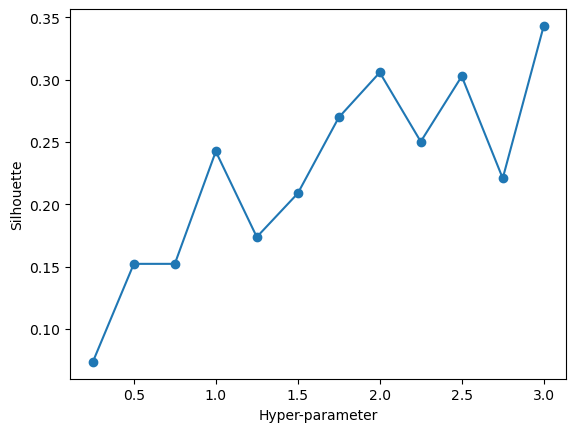

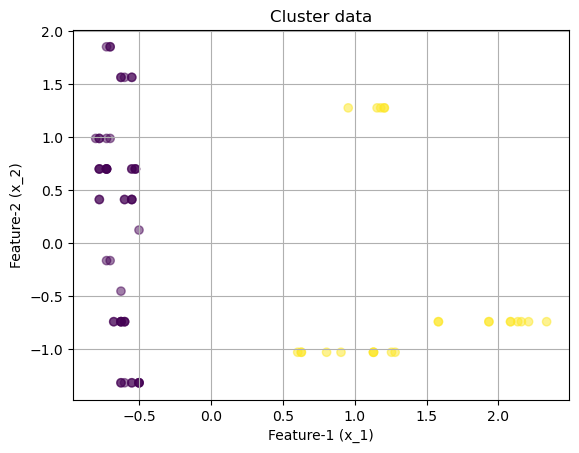

In [226]:
# DBSCAN
opt_labels=maximize_silhouette(X,algo="dbscan",nmax=15, i_plot=True)

plot(X,opt_labels)

In [239]:
# Calculate the silhouette score for the optimal parameter
opt_silhouette = silhouette_score(X, opt_labels)

print(f"Final silhouette score with eps= 3: {opt_silhouette}")


Final silhouette score with eps= 3: 0.34308414158319966


Final silhouette score with eps=2: 0.30574008709460676


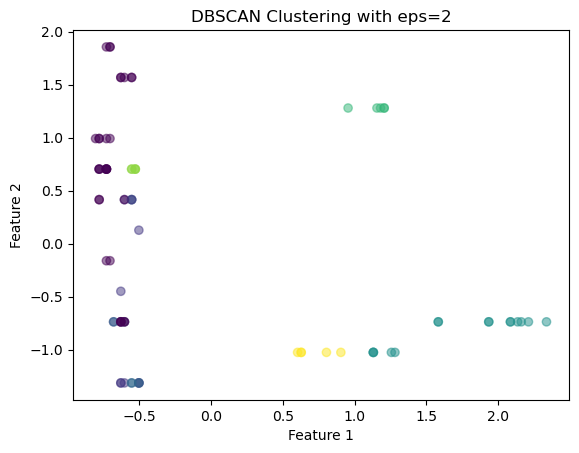

In [228]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

opt_eps = 2 # trying a different eps value
opt_dbscan = DBSCAN(eps=opt_eps)
opt_labels = opt_dbscan.fit_predict(X)

# Calculate the silhouette score for the optimal parameter
opt_silhouette = silhouette_score(X, opt_labels)

# Print the final silhouette score
print(f"Final silhouette score with eps={opt_eps}: {opt_silhouette}")

# Plot the final clustering
plt.scatter(X[:, 0], X[:, 1], c=opt_labels, cmap='viridis', alpha=0.5)
plt.title(f'DBSCAN Clustering with eps={opt_eps}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

We can colude that 3 is indeed the optimal parameter as determined by the silhouette analysis since lowering the parameters to two did not form any clear clusters. The score is also higher for 3 parameters compared to 2 parameters.

# Hierchical Clustering

OPTIMAL PARAMETER = 12


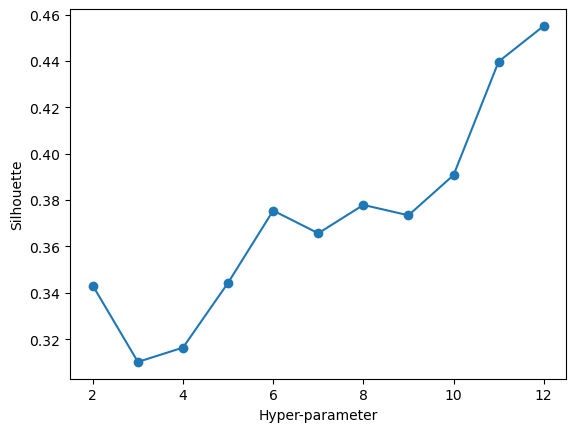

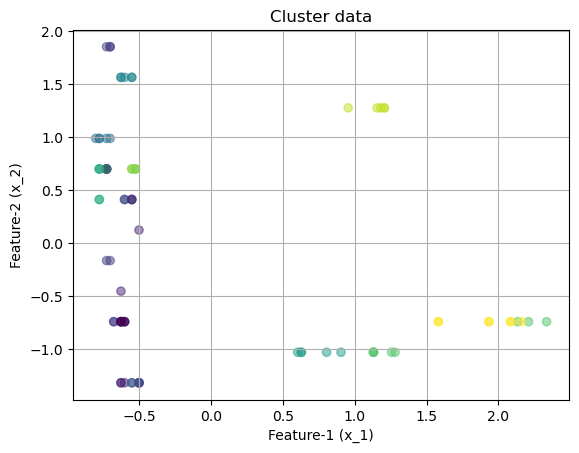

In [230]:
# Perform Agglomerative Clustering

# AGGLOMERATIVE CLUSTERING
opt_labels=maximize_silhouette(X,algo="ag",nmax=12, i_plot=True)
plot(X,opt_labels)

This does provide us with an informative answer since the total feature set to begin with is 12.

 ### Plot the clusters for Agglomerative Clustering

In [231]:
# create linkage for agglomerative clustering, and the dendrogram for the linkage. Suggest the optimal number of clusters based on the dendrogram.

from scipy.cluster.hierarchy import linkage, dendrogram

complete_clustering = linkage(X, method="complete", metric="euclidean")
average_clustering = linkage(X, method="average", metric="euclidean")
single_clustering = linkage(X, method="single", metric="euclidean")

### Method = Complete and Distance metric = Euclidean

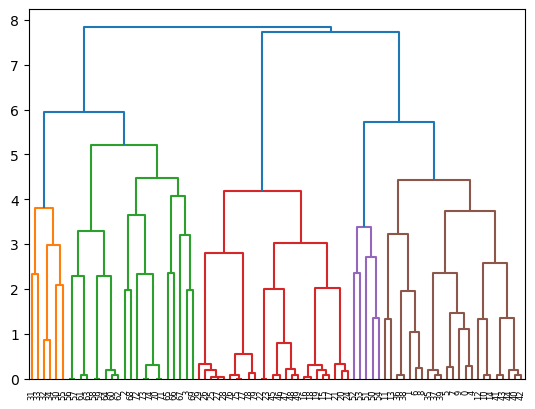

In [232]:
dendrogram(complete_clustering)
plt.show()

### Method = Complete and Distance metric = Manhattan

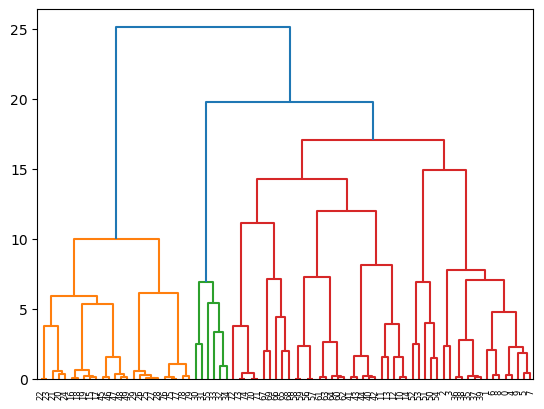

In [233]:
from scipy.cluster.hierarchy import linkage, dendrogram

complete_clustering = linkage(X, method="complete", metric="cityblock")

dendrogram(complete_clustering)
plt.show()


### Method = Average and Distance metric = Euclidean

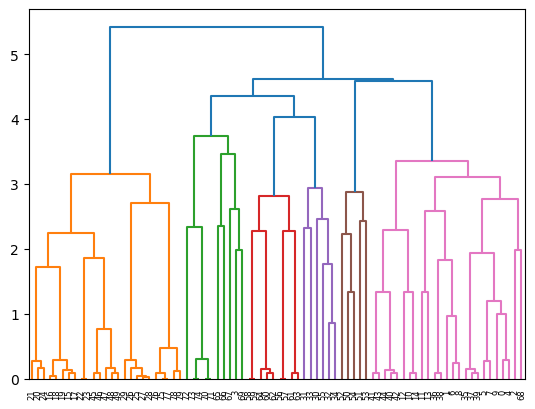

In [234]:
dendrogram(average_clustering)
plt.show()

### Method = Single and Distance metric = Euclidean

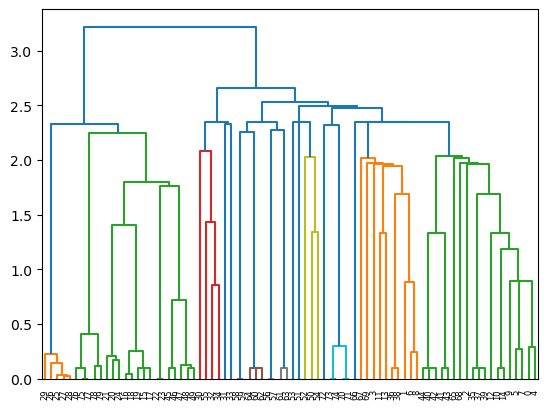

In [235]:
dendrogram(single_clustering)
plt.show()

Which distance metric seems to works best in which cases and why?

> We can observe here that the dendrogram using Complete Linkage with Euclidean Distance shows distinct and meaningful clusters without the chaining effect. This dendrogram presents a clear hierarchy with well-defined clusters, suggesting that this metric may be the best out of the ones provided for clustering the given dataset, especially for distinguishing between different fuel types. The optimal numbe rof parameters based on the denfogram visualization is 3.

## **Final Results**

## KMEANS

/Users/isfarbaset/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


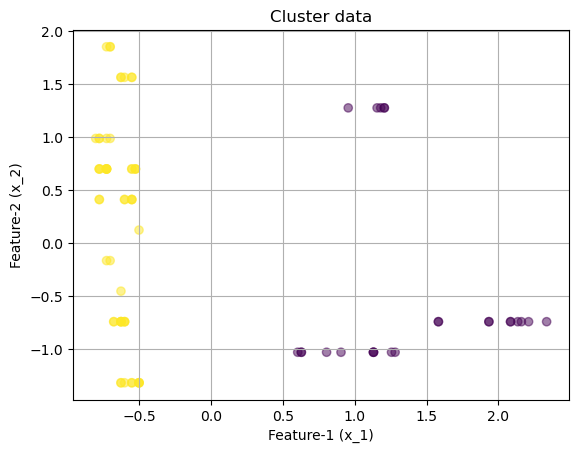

In [236]:
# KMEANS
model = sklearn.cluster.KMeans(n_clusters=2).fit(X)
labels=model.predict(X)
plot(X,labels)


We can see very distinct clusterings for two groups formed. The purple datapoints are more compact & dense while the yellow data points are more spread out. 

## DBSCAN

Final silhouette score with eps=3: 0.34308414158319966


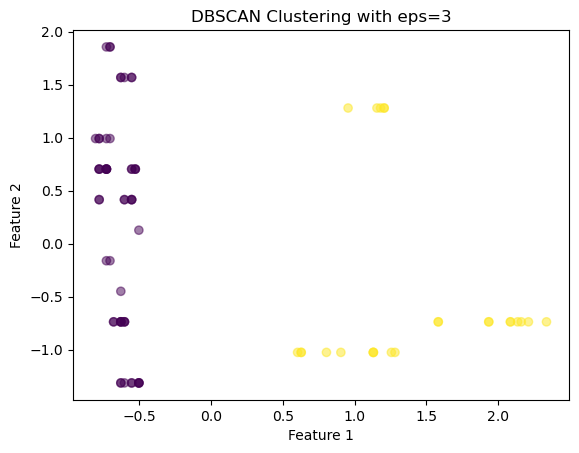

In [237]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

opt_eps = 3 # optimal eps value found from silhouette analysis
opt_dbscan = DBSCAN(eps=opt_eps)
opt_labels = opt_dbscan.fit_predict(X)

# Calculate the silhouette score for the optimal parameter
opt_silhouette = silhouette_score(X, opt_labels)

# Print the final silhouette score
print(f"Final silhouette score with eps={opt_eps}: {opt_silhouette}")

# Plot the final clustering
plt.scatter(X[:, 0], X[:, 1], c=opt_labels, cmap='viridis', alpha=0.5)
plt.title(f'DBSCAN Clustering with eps={opt_eps}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

A silhouette score close to 1 indicates very distinct clusters, so a score of 0.343 implies that while there is some cluster structure, there's room for improvement. The graph illustrates two very distinct groupings between the purple and yellow points

## Hierchical Clustering

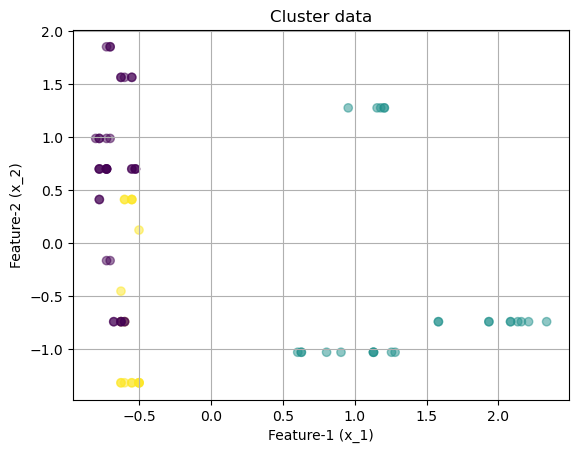

In [238]:
# Hierchical
model = sklearn.cluster.AgglomerativeClustering(n_clusters=3).fit(X)
labels=model.labels_
plot(X,labels)

Based on this graph, we can observe that the green group is clearly separate, suggesting strong similarity among its points. The purple and yellow groups overlap a bit, indicating they're not as clearly defined. This clustering tells us that the data likely has a natural grouping, especially for the green group, and that the second feature is probably more important for grouping than the first.

Which method seemed to work the best and why: 
> Kmeans seemed to have worked best since it creates two distict groups using the optimal paramter of 2 which was the result obtained of the elbow method of hyperparameter tuning.

Which was easier to use or preferable: 
> All three of them were easy to use, thanks to python's schikit-learn library making the algorithms very accessible. Kmeans and DBSCAN was more intuitive to use when compared to hierchical agglomerative clustering. 

Did the clustering results provide any new insights into your data: 
> From the way the clusters are arranged, it can be observe that there is a clear distinction between the two clusters along the Feature 2 (x_2) axis, but not as much along the Feature 1 (x_1) axis. The separation suggests that the clustering algorithms were able to find a division in the data, possibly around a significant difference in the values of Feature 2. This might imply that Feature 2 is a key variable in differentiating the data points into two groups.

## **Conclusion**

We've completed an in-depth analysis of our dataset and identified clear groupings which align with our initial goal of investigating the fuel types used by vehicles, such as electric and gas. The results show a distinct separation between these groups. By further examining the size of these clusters, we'll be able to discern the more common type of vehicle on the road, thus gaining insight into the prevalence of each fuel type. This can be beneficial information for automotive manufacturers to gain insight into the demand of a particular fuel type and adjust production capacity accordingly. If we did not have previous knowledge about the variation in fuel types beforehand, these clustering analysis mechanisms would sufficiently have revealed the existence of two primary categories of cars distinguished by a significant feature.

## References

- https://medium.com/nerd-for-tech/k-means-clustering-using-python-2150769bd0b9 <br>
- https://www.geeksforgeeks.org/hierarchical-clustering-in-data-mining/ <br>
- https://jfh.georgetown.domains/dsan5000/slides-and-labs/_site/content/slides/clustering/notes.html#run-with-true-number-of-clusters <br>
- https://towardsdatascience.com/k-means-dbscan-gmm-agglomerative-clustering-mastering-the-popular-models-in-a-segmentation-c891a3818e29 <br>
- https://www.youtube.com/watch?v=4b5d3muPQmA <br>
- https://www.youtube.com/watch?v=RDZUdRSDOok

